In [1]:
#Importa las librerías necesarias

import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import optimize
from scipy import fftpack

In [2]:
#Lee el archivo excel a analizar
df = pd.read_excel (r'C:\Users\danie\Documents\UNISON\6to semestre\Instrumentación 2\tareadatos.xlsx')

In [3]:
#Imprimimos el data frame con los valores del archivo Excel para confirmar que se leyó correctamente
print(df)

     Tiempo (ms)     Datos
0              0  0.034281
1              1  2.903810
2              2  0.281685
3              3  1.213575
4              4  0.409638
..           ...       ...
251          251 -2.162654
252          252 -1.809242
253          253  2.079974
254          256  1.009394
255          257 -0.584842

[256 rows x 2 columns]


In [4]:
#Observamos el tipo de valores presentes en el archivo
df.dtypes

Tiempo (ms)      int64
Datos          float64
dtype: object

In [5]:
#Convierte el tiempo a milisegundos

#Establecemos el número de valores presentes en el archivo
n = 256

#Creamos una variable tiempo que transforme las unidades de tiempo a milisegundos
t=[float(df["Tiempo (ms)"][i])/1000 for i in range (0,n)]
df["Tiempo"]=t

print(df)

     Tiempo (ms)     Datos  Tiempo
0              0  0.034281   0.000
1              1  2.903810   0.001
2              2  0.281685   0.002
3              3  1.213575   0.003
4              4  0.409638   0.004
..           ...       ...     ...
251          251 -2.162654   0.251
252          252 -1.809242   0.252
253          253  2.079974   0.253
254          256  1.009394   0.256
255          257 -0.584842   0.257

[256 rows x 3 columns]


In [6]:
#Eliminamos la columna de valores de tiempo convertido  
df = df.drop(["Tiempo (ms)"], 1)

In [7]:
print(df)

        Datos  Tiempo
0    0.034281   0.000
1    2.903810   0.001
2    0.281685   0.002
3    1.213575   0.003
4    0.409638   0.004
..        ...     ...
251 -2.162654   0.251
252 -1.809242   0.252
253  2.079974   0.253
254  1.009394   0.256
255 -0.584842   0.257

[256 rows x 2 columns]


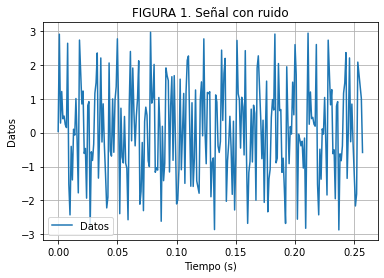

In [8]:
#Graficamos los datos
ax = plt.gca()

df.plot(kind='line',x='Tiempo',y='Datos',ax=ax)


plt.xlabel("Tiempo (s)")   
plt.ylabel("Datos")  
plt.grid()

plt.title('FIGURA 1. Señal con ruido')
plt.savefig('graf1',plt=3000)
plt.show()

In [9]:
#Creamos un arreglo con la lista de valores de Datos del archivo Excel para trabajar con ellos
dat = [float(df["Datos"][i]) for i in range (0,n)]

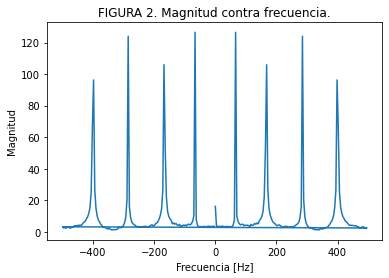

In [10]:
#Aplicamos el método de Transformada Rápida de Fourier (TFF) a la serie de datos para encontrar los valores de resonancia

#Se establece el ancho de paso como un microsegundo 
t_s=0.001

#Calculamos la FFT de los datos de la señal 
sig_fft = fftpack.fft(dat)

# Tomamos su valor absoluto
mag_fft = np.abs(sig_fft)

# Calculamos las frecuencias correspondientes
cor_freq = fftpack.fftfreq(n, d=t_s)

# Graficamos la magnitud contra la frecuencia 
plt.plot(cor_freq, mag_fft)

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

plt.title('FIGURA 2. Magnitud contra frecuencia.')
plt.savefig('graf2',plt=3000)
plt.show()

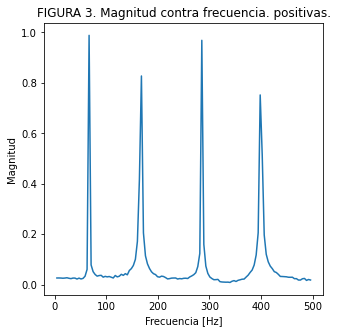

In [11]:
#Se busca identificar frecuencias a partir del cero
pos_freq = cor_freq >0 

# Escalamos la gráfica
esc_fft=2*mag_fft/n

# Hacemos la gráfica escalada
plt.figure(figsize=(5, 5))
plt.plot(cor_freq[pos_freq], esc_fft[pos_freq])

plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')

plt.title('FIGURA 3. Magnitud contra frecuencia. positivas.')
plt.savefig('graf3',plt=3000)
plt.show()

In [12]:
#Agregamos las frecuencias y las magnitudes encontradas como variables
df["Frecuencias"]= cor_freq
df["Magnitud Esc."]= esc_fft

df.head()

,Datos,Tiempo,Frecuencias,Magnitud Esc.
0,0.034281,0.000,0.00000,0.125494
1,2.903810,0.001,3.90625,0.026739
2,0.281685,0.002,7.81250,0.026823
3,1.213575,0.003,11.71875,0.026582
4,0.409638,0.004,15.62500,0.025826


In [14]:
#Ubicamos las frecuencias de resonancia
dfb = df[df["Magnitud Esc."]>0.7]
dfc = dfb[dfb["Frecuencias"]>0]

dfc

,Datos,Tiempo,Frecuencias,Magnitud Esc.
17,-1.776009,0.017,66.40625,0.988599
43,2.054381,0.043,167.96875,0.827583
73,0.331726,0.073,285.15625,0.968928
102,-1.064654,0.102,398.43750,0.752370
